## Credit card fraud detection

#### Today due to increasing demand of online transactions, it is very important for the banks to keep a check of these transactions in order to recognoize whether a particular transaction is normal or fraudulent. In this notebook, we will use 3 different predictive models to see how accurate they are in detecting whether a transaction is a normal payment or a fraud.
#### The datasets contains transactions made by credit cards in September 2013 by european cardholders. This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.
#### It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, the original features and more background information about the data were hiddden. Features V1, V2, ... V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-senstive learning. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.



In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')


## Importing libraries

In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
#from sklearn.naive_bayes import GaussianNB
#from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor

## Reading dataset

In [3]:
df = pd.read_csv(r'../input/creditcardfraud/creditcard.csv')
df['Amount'] = StandardScaler().fit_transform(df['Amount'].values.reshape(-1, 1))
#df
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Time,284807.0,9.481386e+04,47488.145955,0.000000,54201.500000,84692.000000,139320.500000,172792.000000
V1,284807.0,3.919560e-15,1.958696,-56.407510,-0.920373,0.018109,1.315642,2.454930
V2,284807.0,5.688174e-16,1.651309,-72.715728,-0.598550,0.065486,0.803724,22.057729
V3,284807.0,-8.769071e-15,1.516255,-48.325589,-0.890365,0.179846,1.027196,9.382558
V4,284807.0,2.782312e-15,1.415869,-5.683171,-0.848640,-0.019847,0.743341,16.875344
V5,284807.0,-1.552563e-15,1.380247,-113.743307,-0.691597,-0.054336,0.611926,34.801666
V6,284807.0,2.010663e-15,1.332271,-26.160506,-0.768296,-0.274187,0.398565,73.301626
V7,284807.0,-1.694249e-15,1.237094,-43.557242,-0.554076,0.040103,0.570436,120.589494
V8,284807.0,-1.927028e-16,1.194353,-73.216718,-0.208630,0.022358,0.327346,20.007208
V9,284807.0,-3.137024e-15,1.098632,-13.434066,-0.643098,-0.051429,0.597139,15.594995


In [4]:
df.isnull().sum(axis = 0) #checking null values in the dataset

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

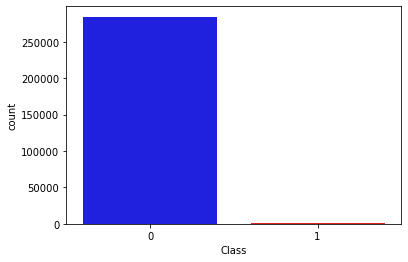

In [5]:
colors = ["b", "r"]
sns.countplot('Class', data=df, palette=colors)

#### As we can see that the data is clearly unbalanced.
#### This dataset is an example of using a typical accuracy score to evaluate our classification algorithm. But in this case, if we just use a majority class to assign values to all records, then probability of incorrectly classifying all "1" would be high.We can overcome this issue by 
* Collecting more data(which is definitly time consuming and could cost more money and efforts) and also not applicable in this particular case
* By changing the performance matric in order to calculate Percission, recall and F1 score via confusion matrix
* Using ROC curves as described in the dataset description
* By resampling the dataset either by OVER-sampling(gives better results when we have small data) or by UNDER-sampling(which deletes instances from the over-represented class)
### Approach
#### In this case first, We are going to compare what happens when using resampling and when not using it. We will test this approach using a simple logistic regression classifier & evaluate the model by using some of the performance metrics. Then,finally, we will perform classifications model using Isolation Forest Algorithm and Local Outlier Factor(LOF) Algorithm.

In [6]:
#Creating a sample dataset
df2= df.sample(frac = 0.2,random_state=1)

df2.shape

(56961, 31)

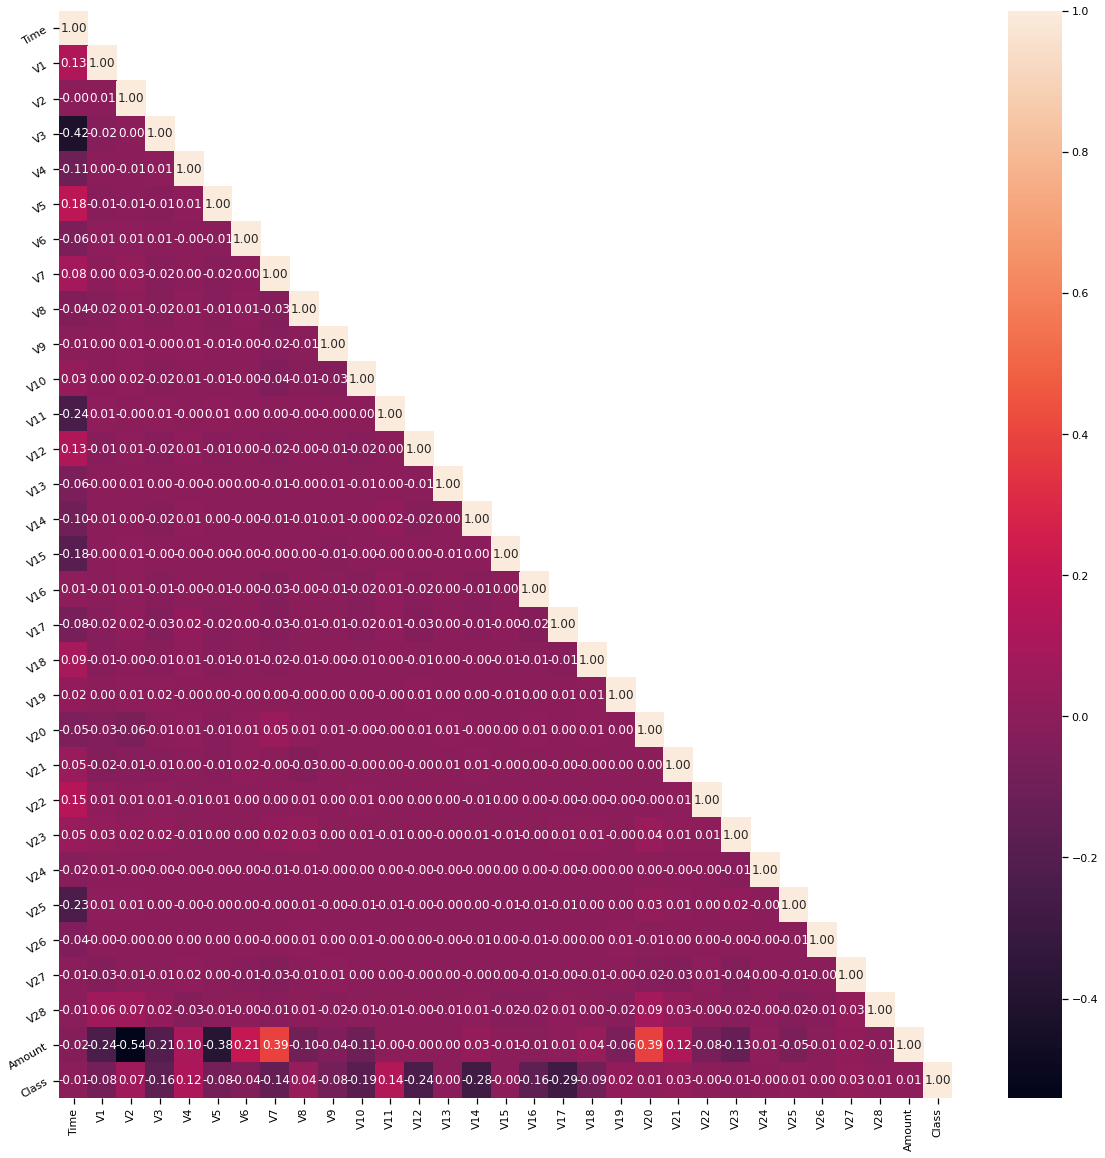

In [7]:
#Correlation
corr = df2.corr()
sns.set_context("notebook", font_scale=1.0, rc={"lines.linewidth": 2.5})
plt.figure(figsize=(20,20))
# create a mask so we only see the correlation values once
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask, 1)] = True
a = sns.heatmap(corr,mask=mask, annot=True, fmt='.2f')
rotx = a.set_xticklabels(a.get_xticklabels(), rotation=90)
roty = a.set_yticklabels(a.get_yticklabels(), rotation=30)

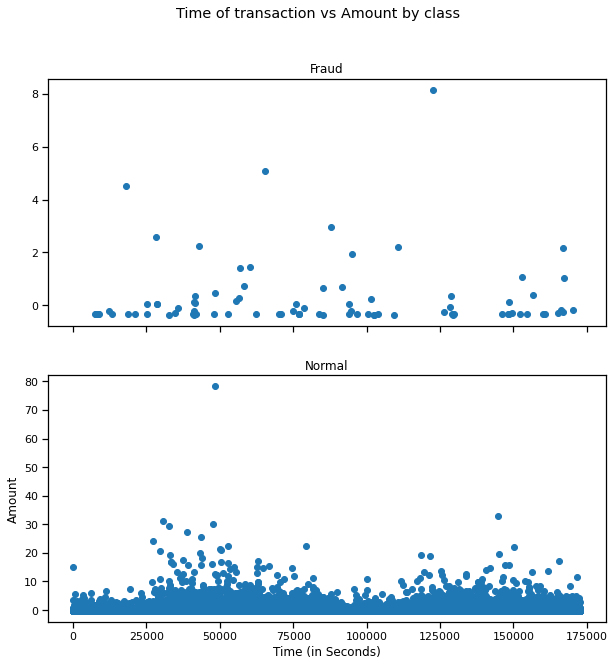

In [8]:
# We Will check Do fraudulent transactions occur more often during certain time frame and visualize the data.
fraud_transactions2 = df2[df2.Class == 1]
Norm_transactions2 = df2[df2.Class == 0]
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True,figsize=(10,10))
f.suptitle('Time of transaction vs Amount by class')
ax1.scatter(fraud_transactions2.Time, fraud_transactions2.Amount)
ax1.set_title('Fraud')
ax2.scatter(Norm_transactions2.Time, Norm_transactions2.Amount)
ax2.set_title('Normal')
plt.xlabel('Time (in Seconds)')
plt.ylabel('Amount')
plt.show()
#fraud_transactions

## Model Prediction
### Logistic regression

In [9]:
X = df.drop(['Class'],axis=1).values
y = df[ 'Class'].values
state = np.random.RandomState(42)
# X_outliers = state.uniform(low=0, high=1, size=(X.shape[0], X.shape[1]))

In [10]:
X2 = df2.drop(['Class'],axis=1).values
y2 = df2[ 'Class'].values

In [11]:
from sklearn.linear_model import LogisticRegression
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2,y2, test_size=.35,random_state=123)
y_train2 = np.ravel(y_train2)
lg=LogisticRegression()
lg.fit(X_train2,y_train2)
y_pred2=lg.predict(X_test2)
print(classification_report(y_test2,y_pred2))
cnf_matrix=(confusion_matrix(y_test2,y_pred2))
print(cnf_matrix)
print("Recall metric in the testing dataset: ", cnf_matrix[1,1]/(cnf_matrix[1,0]+cnf_matrix[1,1]))
print(accuracy_score(y_test2,y_pred2))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     19907
           1       0.65      0.67      0.66        30

    accuracy                           1.00     19937
   macro avg       0.82      0.83      0.83     19937
weighted avg       1.00      1.00      1.00     19937

[[19896    11]
 [   10    20]]
Recall metric in the testing dataset:  0.6666666666666666
0.9989466820484526


#### As we can see the model is offering accuracy score of 99% on the generalised data. But will it work for the whole data. Let's check that

In [12]:
X = df.drop(['Class'],axis=1).values
y = df[ 'Class'].values
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.35,random_state=123)
y_train = np.ravel(y_train)
lg=LogisticRegression()
lg.fit(X_train,y_train)
y_pred=lg.predict(X_test)
print(classification_report(y_test,y_pred))
cnf_matrix=(confusion_matrix(y_test,y_pred))
print(cnf_matrix)
#print("Recall metric in the testing dataset: ", cnf_matrix[1,1]/(cnf_matrix[1,0]+cnf_matrix[1,1]))
print(accuracy_score(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     99496
           1       0.71      0.72      0.71       187

    accuracy                           1.00     99683
   macro avg       0.85      0.86      0.86     99683
weighted avg       1.00      1.00      1.00     99683

[[99441    55]
 [   53   134]]
0.9989165655126752


#### So, Our model lead us to the perfection. Lets try other two models too

In [13]:
outlier_fraction2 = len(fraud_transactions2)/float(len(Norm_transactions2))
IF2= IsolationForest(n_estimators=100, max_samples=len(X2),\
                                       contamination=outlier_fraction2,random_state=state, verbose=0)
IF2.fit(X2)
y_pred2=IF2.predict(X2)
scores_prediction = IF2.decision_function(X2)
y_pred2[y_pred2 == 1] = 0
y_pred2[y_pred2 == -1] = 1
n_errors = (y_pred2 != y2).sum()
print("Isolation Factor is: {}".format(n_errors))
print("Accuracy score is: {}".format(accuracy_score(y2,y_pred2)))
#print(accuracy_score(y2,y_pred2))
print(classification_report(y2,y_pred2))
cnf_matrix=(confusion_matrix(y2,y_pred2))
print(cnf_matrix)
#print(n_errors) 
#y_pred2


Isolation Factor is: 127
Accuracy score is: 0.997770404311722
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56874
           1       0.27      0.28      0.27        87

    accuracy                           1.00     56961
   macro avg       0.64      0.64      0.64     56961
weighted avg       1.00      1.00      1.00     56961

[[56810    64]
 [   63    24]]


In [14]:
fraud_transactions = df[df.Class == 1]
Norm_transactions = df[df.Class == 0]
outlier_fraction = len(fraud_transactions)/float(len(Norm_transactions))
IF= IsolationForest(n_estimators=100, max_samples=len(X),\
                                       contamination=outlier_fraction,random_state=state, verbose=0)
IF.fit(X)
y_pred=IF.predict(X)
scores_prediction = IF.decision_function(X)
y_pred[y_pred == 1] = 0
y_pred[y_pred == -1] = 1
n_errors = (y_pred != y).sum()
print("Isolation Factor is: {}".format(n_errors))
print("Accuracy score is: {}".format(accuracy_score(y,y_pred)))
#print(accuracy_score(y2,y_pred2))
print(classification_report(y,y_pred))
cnf_matrix=(confusion_matrix(y,y_pred))
print(cnf_matrix)
#print(n_errors) 
#y_pred2


Isolation Factor is: 647
Accuracy score is: 0.9977282861727416
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    284315
           1       0.34      0.34      0.34       492

    accuracy                           1.00    284807
   macro avg       0.67      0.67      0.67    284807
weighted avg       1.00      1.00      1.00    284807

[[283991    324]
 [   323    169]]


In [15]:
LOF =LocalOutlierFactor(n_neighbors=20, algorithm='auto', 
                                              leaf_size=30, metric='minkowski',
                                              p=2, metric_params=None, contamination=outlier_fraction)
y_pred3 = LOF.fit_predict(X2)
scores_prediction = LOF.negative_outlier_factor_
y_pred3[y_pred3 == 1] = 0
y_pred3[y_pred3 == -1] = 1
print("Local outlier Factor is: {}".format(n_errors))
print("Accuracy score is: {}".format(accuracy_score(y2,y_pred3)))
print(classification_report(y2,y_pred3))
cnf_matrix=(confusion_matrix(y2,y_pred3))
print(cnf_matrix)
n_errors = (y_pred3 != y2).sum()
 

Local outlier Factor is: 647
Accuracy score is: 0.9967697196327312
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56874
           1       0.01      0.01      0.01        87

    accuracy                           1.00     56961
   macro avg       0.50      0.50      0.50     56961
weighted avg       1.00      1.00      1.00     56961

[[56776    98]
 [   86     1]]


In [16]:
LOF2 =LocalOutlierFactor(n_neighbors=20, algorithm='auto', 
                                              leaf_size=30, metric='minkowski',
                                              p=2, metric_params=None, contamination=outlier_fraction)
y_pred3 = LOF2.fit_predict(X)
scores_prediction = LOF2.negative_outlier_factor_
y_pred3[y_pred3 == 1] = 0
y_pred3[y_pred3 == -1] = 1
print("Local outlier Factor is: {}".format(n_errors))
print("Accuracy score is: {}".format(accuracy_score(y,y_pred3)))
print(classification_report(y,y_pred3))
cnf_matrix=(confusion_matrix(y,y_pred3))
print(cnf_matrix)
n_errors = (y_pred3 != y).sum()

Local outlier Factor is: 184
Accuracy score is: 0.9969558332484806
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    284315
           1       0.12      0.12      0.12       492

    accuracy                           1.00    284807
   macro avg       0.56      0.56      0.56    284807
weighted avg       1.00      1.00      1.00    284807

[[283881    434]
 [   433     59]]


### Observations :
* All three models have almost same accuracy
* When comparing error precision & recall for 3 models , the Logistic regression performed much better than the LOF as we can see that the detection of fraud cases is around 72% versus LOF detection rate of just 34% and SVM of 12%.
* So overall Logistic regression Method performed much better in determining the fraud cases.
* We can also improve on this accuracy by increasing the sample size or use deep learning algorithms however at the cost of computational expense.We can also use complex anomaly detection models to get better accuracy in determining more fraudulent cases.

### Note
* This notebook is based on my learning and understanding of machine learning towards data science. If you find something which need to be correct and improvement then please try to correct me on this. It will be appreciable. Thanks